In [ ]:
## average grade
## max grade 
## max grade x time climber
## avg grade x heigth
## avg grade x weigth
## most climbed crags
## crags with the 

In [3]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read sqlite query results into a pandas DataFrame
def qry(q, connection = sqlite3.connect("C:/Users/Lince/Documents/8anu-climbing-logbook/database.sqlite")):
    df = pd.read_sql_query(q, connection)
    connection.close
    return df

In [4]:
# work w dataframes
df_user = qry("SELECT * FROM USER")
df_grade = qry("SELECT * FROM grade")
df_method = qry("SELECT * FROM method")
df_ascent = qry("SELECT * FROM ascent")

In [5]:
#convert to csvs
df_user.to_csv('C:/Users/Lince/Documents/8anu-climbing-logbook/user_data.csv', index=False)
df_grade.to_csv('C:/Users/Lince/Documents/8anu-climbing-logbook/grade_data.csv', index=False)
df_method.to_csv('C:/Users/Lince/Documents/8anu-climbing-logbook/method_data.csv', index=False)
df_ascent.to_csv('C:/Users/Lince/Documents/8anu-climbing-logbook/ascent_data.csv', index=False)

In [6]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62593 entries, 0 to 62592
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            62593 non-null  int64 
 1   first_name    62593 non-null  object
 2   last_name     62593 non-null  object
 3   city          62593 non-null  object
 4   country       62593 non-null  object
 5   sex           62593 non-null  int64 
 6   height        62593 non-null  int64 
 7   weight        62593 non-null  int64 
 8   started       62593 non-null  int64 
 9   competitions  47942 non-null  object
 10  occupation    47946 non-null  object
 11  sponsor1      47644 non-null  object
 12  sponsor2      47633 non-null  object
 13  sponsor3      47627 non-null  object
 14  best_area     47942 non-null  object
 15  worst_area    1227 non-null   object
 16  guide_area    47942 non-null  object
 17  interests     47946 non-null  object
 18  birth         27856 non-null  object
 19  pres

In [32]:
df_user.drop(columns=['first_name','last_name'], inplace=True)

In [15]:
df_user['country'].unique().shape

(215,)

In [21]:
df_user['country'].unique()

array(['SWE', 'USA', 'AUS', 'NOR', 'NLD', 'BEL', 'PRT', 'AUT', 'DEU',
       'CAN', 'SGP', 'NZL', 'SVN', 'GBR', 'none', 'ITA', 'FRA', 'DNK',
       'POL', 'MEX', 'HUN', 'ZAF', 'ESP', 'COL', 'IDN', 'CHE', 'MYS',
       'BRA', 'CZE', 'JOR', 'FXX', 'JPN', 'IRL', 'FIN', 'GRC', 'AFG',
       'HRV', 'UGA', 'PHL', 'ARG', '', 'NGA', 'BHS', 'BMU', 'ZWE', 'GNB',
       'SRB', 'RUS', 'YUG', 'ESH', 'CHN', 'BGR', 'HKG', 'AGO', 'ISL',
       'NIU', 'ISR', 'QAT', 'ROM', 'PER', 'KOR', 'SVK', 'GAB', 'GRL',
       'UKR', 'ALB', 'HND', 'AND', 'ZMB', 'WSM', 'UZB', 'CHL', 'LVA',
       'LUX', 'NIC', 'BDI', 'IND', 'MDA', 'NPL', 'LKA', 'ECU', 'RWA',
       'BLZ', 'TUR', 'THA', 'TON', 'IRQ', 'IRN', 'MSR', 'VEN', 'NAM',
       'OMN', 'BOL', 'DZA', 'TWN', 'URY', 'ATG', 'LTU', 'PAK', 'FRA\n',
       'AZE', '0', '176', 'PYF', 'KAZ', 'SWE\n', 'ERI', 'SHN', 'YEM',
       'KWT', 'BLR', 'DOM', 'CRI', 'GUM', 'ETH', 'MDG', 'MWI', 'BRB',
       'GTM', 'MUS', 'MKD', 'SAU', 'EGY', 'JAM', 'GNQ', 'ARE', 'TZA',
       'BIH',

In [14]:
df_user['country'].value_counts()

USA    11861
ESP     6905
DEU     3712
SWE     3629
ITA     3590
       ...  
MOZ        1
MWI        1
NCL        1
RSU        1
SGS        1
Name: country, Length: 215, dtype: int64

In [33]:
df_user.country.replace('SWE\n','SWE', inplace=True)
df_user.country.replace('FRA\n','SWE', inplace=True)
df_user.country.replace(['','0','176','none'],'ZZZ', inplace=True)

In [34]:
df_user['country'].unique()

array(['SWE', 'USA', 'AUS', 'NOR', 'NLD', 'BEL', 'PRT', 'AUT', 'DEU',
       'CAN', 'SGP', 'NZL', 'SVN', 'GBR', 'ZZZ', 'ITA', 'FRA', 'DNK',
       'POL', 'MEX', 'HUN', 'ZAF', 'ESP', 'COL', 'IDN', 'CHE', 'MYS',
       'BRA', 'CZE', 'JOR', 'FXX', 'JPN', 'IRL', 'FIN', 'GRC', 'AFG',
       'HRV', 'UGA', 'PHL', 'ARG', 'NGA', 'BHS', 'BMU', 'ZWE', 'GNB',
       'SRB', 'RUS', 'YUG', 'ESH', 'CHN', 'BGR', 'HKG', 'AGO', 'ISL',
       'NIU', 'ISR', 'QAT', 'ROM', 'PER', 'KOR', 'SVK', 'GAB', 'GRL',
       'UKR', 'ALB', 'HND', 'AND', 'ZMB', 'WSM', 'UZB', 'CHL', 'LVA',
       'LUX', 'NIC', 'BDI', 'IND', 'MDA', 'NPL', 'LKA', 'ECU', 'RWA',
       'BLZ', 'TUR', 'THA', 'TON', 'IRQ', 'IRN', 'MSR', 'VEN', 'NAM',
       'OMN', 'BOL', 'DZA', 'TWN', 'URY', 'ATG', 'LTU', 'PAK', 'AZE',
       'PYF', 'KAZ', 'ERI', 'SHN', 'YEM', 'KWT', 'BLR', 'DOM', 'CRI',
       'GUM', 'ETH', 'MDG', 'MWI', 'BRB', 'GTM', 'MUS', 'MKD', 'SAU',
       'EGY', 'JAM', 'GNQ', 'ARE', 'TZA', 'BIH', 'MDV', 'SLV', 'REU',
       'SMR', 'TJK',

In [59]:
## focusing my analysis on portuguese climbers

df_pt = df_user.loc[df_user['country']=='PRT']
df_pt.shape # 610 users registered

(610, 20)

In [72]:
df_pt.head()

,id,city,country,sex,height,weight,started,competitions,occupation,sponsor1,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
17,21,Mem Martins,PRT,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,0,0
25,29,Covilhã,PRT,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,0,0
153,165,Lisbon,PRT,0,172,58,2000,,,Blocospot,,,,None,,,1975-12-28,,0,0
347,361,Lisbon,PRT,0,167,73,1997,1º at nationals,Graphic Designer,,,,Bleau,None,Portugal,bodyboard,1983-03-27,"Graphic Designer, frustrated by not having en...",1,0
358,376,porto,PRT,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,0,0


In [60]:
df_pt['sex'].value_counts() ## by my knowlege of the climbing community and 8a.nu I am pretty sure 0 means Male

0    544
1     66
Name: sex, dtype: int64

In [62]:
df_pt[df_user['sex']==1].head() #mulheres escaladoras

C:\Users\Lince\AppData\Local\Temp/ipykernel_7624/1490077197.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pt[df_user['sex']==1].head() #mulheres escaladoras


,id,city,country,sex,height,weight,started,competitions,occupation,sponsor1,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
2117,2188,Santarem,PRT,1,0,0,0,None,None,None,None,None,None,None,None,None,None,None,0,0
7021,7389,Porto,PRT,1,163,48,2004,1,,,,,,None,,,1974-05-14,,0,0
8094,8498,Lisbon,PRT,1,159,48,2000,,Teacher,petzl,Beal,Espaços Naturais,,None,,Surf,1979-06-05,"If I could, my life would be mainly about clim...",0,0
8479,8898,Lisboa,PRT,1,172,58,1998,,Environmental Engineer,Boreal,Petzl e Beal,Espaços Naturais,,None,,www.isabelboavida.com,1979-01-31,www.isabelboavida.com\r\nwww.blogdabolinha.blo...,0,0
8690,9119,Lisbon,PRT,1,169,48,2000,,,,,,,None,,,1982-08-03,,0,0


In [37]:
#df_user['sex'].replace(255,None,inplace=True)

In [63]:
df_pt['weight'].value_counts()

0      255
63      77
68      76
73      56
58      34
78      30
53      23
88      14
83      14
48      13
93       6
40       5
43       4
100      2
98       1
Name: weight, dtype: int64

<AxesSubplot:ylabel='Frequency'>

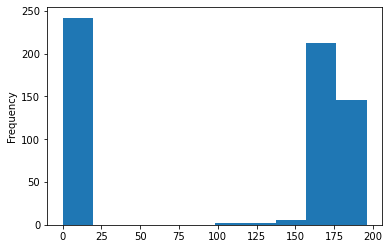

In [64]:
df_pt['height'].plot(kind='hist')

In [78]:
df_pt.loc[df_pt['competitions'].isna()==False]

,id,city,country,sex,height,weight,started,competitions,occupation,sponsor1,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
347,361,Lisbon,PRT,0,167,73,1997,1º at nationals,Graphic Designer,,,,Bleau,None,Portugal,bodyboard,1983-03-27,"Graphic Designer, frustrated by not having en...",1,0
389,408,Lisboa,PRT,0,172,63,2001,"1st in Nationals, both lead and boulder",Climber,Petzl,Beal,,Meio Mango!,None,Portugal...,Music,1985-09-08,,0,0
2276,2357,Lisbon,PRT,0,175,68,2001,1st LRC IM men,Student,Evolv,,,Fenda,None,???,"Yoga, Astrophysics, Massage",1978-06-05,,0,0
3946,4104,ourem,PRT,0,174,0,1999,7,estudante,,,,Reguengo do fetal,,,,1984-01-17,,0,0
4983,5181,Faro,PRT,0,174,73,1998,5º University Comp. 02 / 11º Boulder 05,Professor,AMEA,,,Sagres; Fenda; Poios; Kalymnos; Chiang Mai; Ma...,None,"Rocha da Pena, Sagres, Fenda, Guia, Poios, Bur...","Nature, bikes, parachuting",1979-12-23,Best ever: 7b onsigth and 7c redpoint,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47513,50602,Ponta Delgada,PRT,0,165,63,2003,5,Special Forças,,,,,None,Azores,,None,,0,0
47614,50710,Lisboa,PRT,0,170,78,2013,5,,,,,,None,Lisbon,"Diving, indoor exercice, exploring the wildlif...",1983-01-29,"This was a huge change in my life...\r\nWell, ...",0,0
47653,50753,Maia,PRT,0,0,0,2011,5,,,,,,None,,,None,,0,0
47830,50947,Torres Vedras,PRT,1,170,53,2013,5,,,,,,None,,,None,,0,0


In [77]:
df_pt.loc[df_pt['competitions']=='']

,id,city,country,sex,height,weight,started,competitions,occupation,sponsor1,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous


In [76]:
df_pt['competitions'].replace('', None, inplace=True)

In [68]:
df_pt.iloc[3]

id                                                            361
city                                                       Lisbon
country                                                       PRT
sex                                                             0
height                                                        167
weight                                                         73
started                                                      1997
competitions                                      1º at nationals
occupation                                       Graphic Designer
sponsor1                                                         
sponsor2                                                         
sponsor3                                                         
best_area                                                   Bleau
worst_area                                                   None
guide_area                                               Portugal
interests 

In [48]:
df_user.loc[df_user['birth']=='1990-09-30']

,id,city,country,sex,height,weight,started,competitions,occupation,sponsor1,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
13967,14556,sabadell,ESP,0,172,68,2006,,estudiant,bloc area,,,,None,,,1990-09-30,,0,0
23769,24768,Bishop,USA,0,170,58,2006,,student,,,,,None,,,1990-09-30,,0,0
52194,55671,Lisboa,PRT,0,170,63,0,,,,,,,None,,,1990-09-30,,0,0


In [49]:
df_ascent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111877 entries, 0 to 4111876
Data columns (total 28 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id                    int64 
 1   user_id               int64 
 2   grade_id              int64 
 3   notes                 object
 4   raw_notes             int64 
 5   method_id             int64 
 6   climb_type            int64 
 7   total_score           int64 
 8   date                  int64 
 9   year                  int64 
 10  last_year             int64 
 11  rec_date              int64 
 12  project_ascent_date   int64 
 13  name                  object
 14  crag_id               int64 
 15  crag                  object
 16  sector_id             int64 
 17  sector                object
 18  country               object
 19  comment               object
 20  rating                int64 
 21  description           object
 22  yellow_id             int64 
 23  climb_try             int64 
 24

In [79]:
df_ascent.loc[df_ascent['user_id']==408,['crag','sector','name','grade_id']]

,crag,sector,name,grade_id
5656,,,Assusta mas não cust,49
5657,,,Kamikaze,49
6657,Senhora da estrela,,Passa por mim no Pin,51
6658,Fenda,El Carallon,Spuf,49
6659,Vale dos Poios,,O peregrino,49
...,...,...,...,...
4001370,Teverga,Gradura,Carlitos Way,62
4001377,Teverga,California,California,59
4027367,Fenda,El Carallon,Carneirada,59
4085855,Céüse,Demi Lune,Le poinçonneur des lilas,64


In [52]:
df_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     83 non-null     int64 
 1   score                  83 non-null     int64 
 2   fra_routes             83 non-null     object
 3   fra_routes_input       83 non-null     int64 
 4   fra_routes_selector    83 non-null     int64 
 5   fra_boulders           83 non-null     object
 6   fra_boulders_input     83 non-null     int64 
 7   fra_boulders_selector  83 non-null     int64 
 8   usa_routes             83 non-null     object
 9   usa_routes_input       83 non-null     int64 
 10  usa_routes_selector    83 non-null     int64 
 11  usa_boulders           83 non-null     object
 12  usa_boulders_input     83 non-null     int64 
 13  usa_boulders_selector  83 non-null     int64 
dtypes: int64(10), object(4)
memory usage: 9.2+ KB


In [54]:
df_grade

,id,score,fra_routes,fra_routes_input,fra_routes_selector,fra_boulders,fra_boulders_input,fra_boulders_selector,usa_routes,usa_routes_input,usa_routes_selector,usa_boulders,usa_boulders_input,usa_boulders_selector
0,1,0,-,1,1,-,1,1,3/4,1,1,VB,1,1
1,2,0,1,0,0,1,0,0,,0,0,,0,0
2,3,0,1a,0,0,1A,0,0,,0,0,,0,0
3,4,0,1b,0,0,1B,0,0,,0,0,,0,0
4,5,0,1c,0,0,1C,0,0,,0,0,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,82,1475,9b+/9c,0,0,9B+/9C,0,0,,0,0,,0,0
79,83,1500,9c,0,0,9C,0,0,,0,0,,0,0
80,84,1525,9c/+,0,0,9C/+,0,0,,0,0,,0,0
81,85,1550,9c+,0,0,9C+,0,0,,0,0,,0,0
